In [1]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/MyDrive/Dataset')

Mounted at /content/drive


In [2]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [3]:
from pix2pix import *

In [4]:
images = []
for i in np.sort(os.listdir("./Train/images/")):
  images.append(cv2.resize(cv2.imread(os.path.join("./Train/images/",i)),(256,256)))
images = (np.array(images)-127.5)/255
images = images.reshape(-1,256,256,3)
images.shape

(50, 256, 256, 3)

In [5]:
labels = []
for i in np.sort(os.listdir("./Train/labels/")):
  labels.append(cv2.resize(cv2.imread(os.path.join("./Train/labels/",i)),(256,256)))
labels = (np.array(labels)-127.5)/255
labels = labels.reshape(-1,256,256,3)
labels.shape

(50, 256, 256, 3)

In [6]:
# load image data
dataset = [images,labels]
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]

Loaded (50, 256, 256, 3) (50, 256, 256, 3)


In [7]:
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
# train model
# train(d_model, g_model, gan_model, dataset,n_epochs = 200,n_batch = 8)

In [9]:
from infernce import *

Loaded (1, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


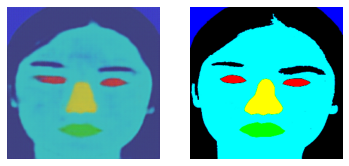

In [23]:
src_image = load_image('/content/drive/MyDrive/Dataset/Test/images/1.bmp')
print('Loaded', src_image.shape)
# load model
model = load_model("model_001200.h5")
# generate image from source
gen_image = model.predict(src_image)
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image
pyplot.subplot(1,2,1)
pyplot.imshow(np.clip(gen_image[0]*255,0,255).astype("uint8"))
pyplot.axis('off')
# pyplot.show()
pyplot.subplot(1,2,2)
src_image = load_image('/content/drive/MyDrive/Dataset/Test/labels/1.bmp')
pyplot.imshow(src_image[0])
pyplot.axis('off')
pyplot.show()